In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [179]:
XT=pd.read_csv("train.csv")
Xt=pd.read_csv("test.csv")

In [180]:
XT.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [181]:
XT.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [182]:
YT=XT["Survived"]

In [183]:
XT.drop(columns=["Cabin","Survived"],inplace=True)

In [184]:
Xt.drop(columns=["Cabin"],inplace=True)

In [185]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [186]:
XT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [187]:
for col in XT.columns:
    if(col not in Xt.columns):
        print(col)

In [188]:
YT

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [189]:
XT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [190]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [191]:
XT["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [204]:
XT["Embarked"].value_counts().keys()

Index(['S', 'C', 'Q'], dtype='object')

In [196]:
XT["Age"]=XT["Age"].fillna(XT["Age"].mean())

In [198]:
Xt["Age"]=Xt["Age"].fillna(Xt["Age"].mean())

In [200]:
Xt["Fare"]=Xt["Fare"].fillna(Xt["Fare"].mean())

In [202]:
XT.fillna(XT["Embarked"].value_counts().keys()[0],inplace=True)

In [205]:
XT.drop(columns=["Name"],inplace=True)

In [206]:
Xt.drop(columns=["Name"],inplace=True)

In [207]:
XT.drop(columns=["Ticket"],inplace=True)

In [208]:
Xt.drop(columns=["Ticket"],inplace=True)

In [209]:
#XT.drop(columns=["Embarked"],inplace=True)

In [210]:
#Xt.drop(columns=["Embarked"],inplace=True)

In [211]:
XT.shape

(891, 8)

In [212]:
Xt.shape

(418, 8)

In [213]:
YT.shape

(891,)

In [238]:
model=Sequential()

In [239]:
model.add(Dense(512,activation="relu",input_shape=(10,)))
model.add(Dense(64,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [240]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               5632      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_19 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 39,521
Trainable params: 39,521
Non-trainable params: 0
_________________________________________________________________


In [217]:
from sklearn import preprocessing

In [218]:
XT["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [219]:
min_max_scalar=preprocessing.MinMaxScaler()

In [220]:
XT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [221]:
le=preprocessing.LabelEncoder()

In [222]:
XT["Sex"]=le.fit_transform(XT["Sex"])

In [223]:
Xt["Sex"]=le.transform(Xt["Sex"])

In [224]:
Xt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 24.6+ KB


In [225]:
le=preprocessing.LabelEncoder()

In [228]:
XT=pd.get_dummies(XT)

In [230]:
Xt=pd.get_dummies(Xt)

In [231]:
XT=min_max_scalar.fit_transform(XT)

In [232]:
XT

array([[0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.0011236 , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00224719, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.99775281, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.9988764 , 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [233]:
Xt=min_max_scalar.transform(Xt)

In [234]:
XT.shape

(891, 10)

In [235]:
Xt.shape

(418, 10)

In [241]:
hist=model.fit(XT,YT,epochs=100,validation_split=0.1)

Train on 801 samples, validate on 90 samples
Epoch 1/100
801/801 [==============================] - 0s 265us/step - loss: 0.6211 - accuracy: 0.7016 - val_loss: 0.6600 - val_accuracy: 0.7889
Epoch 2/100
801/801 [==============================] - 0s 45us/step - loss: 0.5147 - accuracy: 0.7965 - val_loss: 0.4236 - val_accuracy: 0.8333
Epoch 3/100
801/801 [==============================] - 0s 60us/step - loss: 0.5011 - accuracy: 0.8015 - val_loss: 0.4254 - val_accuracy: 0.8333
Epoch 4/100
801/801 [==============================] - 0s 65us/step - loss: 0.4679 - accuracy: 0.7990 - val_loss: 0.4539 - val_accuracy: 0.8000
Epoch 5/100
801/801 [==============================] - 0s 65us/step - loss: 0.5331 - accuracy: 0.7865 - val_loss: 0.4173 - val_accuracy: 0.8333
Epoch 6/100
801/801 [==============================] - 0s 60us/step - loss: 0.4876 - accuracy: 0.8015 - val_loss: 0.4368 - val_accuracy: 0.8222
Epoch 7/100
801/801 [==============================] - 0s 65us/step - loss: 0.5261 - accur

801/801 [==============================] - 0s 75us/step - loss: 0.4076 - accuracy: 0.7865 - val_loss: 0.3967 - val_accuracy: 0.7000
Epoch 58/100
801/801 [==============================] - 0s 75us/step - loss: 0.3964 - accuracy: 0.7778 - val_loss: 0.6925 - val_accuracy: 0.7111
Epoch 59/100
801/801 [==============================] - 0s 70us/step - loss: 0.4151 - accuracy: 0.7803 - val_loss: 0.3656 - val_accuracy: 0.7444
Epoch 60/100
801/801 [==============================] - 0s 75us/step - loss: 0.3968 - accuracy: 0.7903 - val_loss: 0.4001 - val_accuracy: 0.7111
Epoch 61/100
801/801 [==============================] - 0s 80us/step - loss: 0.3935 - accuracy: 0.7815 - val_loss: 0.3742 - val_accuracy: 0.7222
Epoch 62/100
801/801 [==============================] - 0s 65us/step - loss: 0.3915 - accuracy: 0.7865 - val_loss: 0.6737 - val_accuracy: 0.7111
Epoch 63/100
801/801 [==============================] - 0s 65us/step - loss: 0.3942 - accuracy: 0.7765 - val_loss: 0.5137 - val_accuracy: 0.711

In [242]:
hist.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

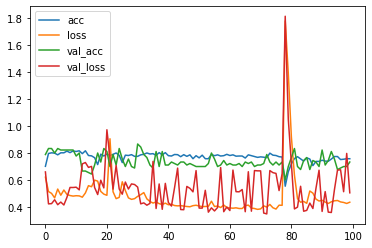

In [243]:
acc=hist.history["accuracy"]
loss=hist.history["loss"]
val_loss=hist.history["val_loss"]
val_acc=hist.history["val_accuracy"]

plt.plot(acc,label="acc")
plt.plot(loss,label="loss")
plt.plot(val_acc,label="val_acc")
plt.plot(val_loss,label="val_loss")

plt.legend()
plt.show()

In [244]:
from sklearn.linear_model import LogisticRegression

In [245]:
lr=LogisticRegression()

In [246]:
lr.fit(XT,YT)

c:\users\bhagesh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [247]:
lr.predict(Xt)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [248]:
#Results using Scikit Learn Logistic Regression Model
lr.score(XT,YT)

0.8013468013468014

In [249]:
#Results Using Neural Network
model.evaluate(XT,YT)

891/891 [==============================] - 0s 22us/step


[0.4348958638046192, 0.7586981058120728]

In [250]:
XT.shape

(891, 10)

In [251]:
YT.shape

(891,)

In [252]:
YTrain=np.resize(YT,(YT.shape[0],1))

In [253]:
YTrain.shape

(891, 1)

# My Logistic Regression Model

In [254]:
def sigmoid(z):
    return 1/(1.0+np.exp(-z))

def y_hat(X,theta):
    return sigmoid(np.dot(X,theta))

def predict(X,theta):
    Y_=y_hat(X,theta)
    outputs=np.zeros((Y_.shape))
    outputs[Y_>0.5]=1
    return outputs

def error(X,Y,theta):
    Y_=y_hat(X,theta)
    e=-np.sum(Y*np.log(Y_)+(1-Y)*np.log(1-Y_))
    m=X.shape[0]
    return e/m

def getgrad(X,Y,theta):
    Y_=y_hat(X,theta)
    grad=np.dot(X.T,Y_-Y)
    m=X.shape[0]
    return grad/m

def gradientdescent(X,Y,lr=0.1):
    theta=np.zeros((X.shape[1],1))
    error_list=[]
    for i in range(1000):
        grad=getgrad(X,Y,theta)
        theta=theta-lr*grad
        e=error(X,Y,theta)
        error_list.append(e)
    return theta,error_list

In [255]:
theta,error_list=gradientdescent(XT,YTrain)

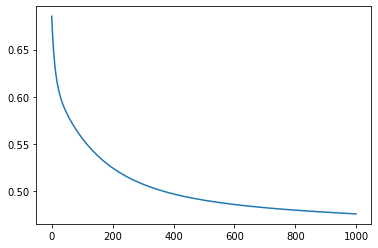

In [256]:
plt.plot(error_list)

In [257]:
Y_=predict(XT,theta)

In [258]:
Y_

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [259]:
c=0
for x in range(YT.shape[0]):
    if YT[x]==Y_[x]:
        c+=1

In [260]:
#Accuracy of manually made linear regression model
c/YT.shape[0]*100

77.32884399551067

In [261]:
pred=predict(Xt,theta)

In [262]:
pred

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [263]:
td=pd.read_csv("test.csv")

In [264]:
td

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [272]:
pid=np.resize(td["PassengerId"],(pred.shape))

In [274]:
finalpred=np.hstack((pid,pred))

In [276]:
finalpred=pd.DataFrame(finalpred,columns=["PassengerId","Survived"])

In [282]:
finalpred=finalpred.astype(int)

In [283]:
finalpred

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [284]:
finalpred.to_csv("pred.csv",index=False)